In [1]:
#Uma vez que não temos como categorizar o perfil de um cliente, nós utilizamos clusterização para descobrir esse perfil e criar essas categorias.
#Frequência é um atributo que conseguimos categorizar facilmente, atribuindo os rótulos baixa, média ou alta. Como temos os rótulos, podemos utilizar a técnica de classificação e assim classificar novos clientes.


In [2]:
import pandas as pd

dataframe = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')
dataframe

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
dataframe.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
#processamento dos dados
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True) #inplace indica que vai mudar no mesmo arquivo que estamos trabalhando
dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [5]:
#procurando missing data
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [6]:
#substituindo os valores faltantes pela media/mediana
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [7]:
#é preciso usar a normalizacao para que as variaveis tenham parametros na mesma faixa de trabalho (zero a 1)
#Os valores de cada atributo devem estar no mesmo intervalo, caso contrário o algoritmo de agrupamento pode acabar priorizando somente alguns atributos.

from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [8]:
from sklearn.cluster import KMeans #algoritmo nao deterministico

kmeans = KMeans(n_clusters = 5, n_init= 10, max_iter=300) 
#n_clusters inicialmente indicamos 5 vezes
#n_init é um parametro para ele retornar o resultado tantas vezes que indicarmos, no caso 10
#max_iter define o maximo de interacoes

y_pred = kmeans.fit_predict(values)

In [9]:
#validando os clusters
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)
#valor de -1 a 1. sendo positivo parece bom

0.36454314826693845


In [10]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)
#quanto mais proximo de zero melhor

1.075812734747931


In [11]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.800540734652


In [12]:
#Foram estudadas três medidas para avaliar um clustering: silhouette, davies bouldin e calinski harabasz. Todas elas buscam satisfazer os critérios de compactação e separação dos clusters. 
#Os índices davies-bouldin e calinski harabasz utilizam centróides em seus cálculos.
#A principal diferença do índice calinski harabasz em relação às outras medidas é o cálculo da variância.

In [13]:
#validacao relativa, compara as metricas com as configuracoes diferentes do algoritmo, identificando o melhor e pior resultado
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters, n_init=10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [14]:
s1, dbs1, calinski1 = clustering_algorithm(3, values) #values valores chamados nas linhas inicial
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.4405199082735


In [15]:
s2, dbs2, calinski2 = clustering_algorithm(5, values) #values valores chamados nas linhas inicial
print(s2, dbs2, calinski2)

0.36454259456819194 1.0761660873408905 3431.794224707802


In [16]:
# de acordo com silhouette melhora um pouco, dbs diminui o que é bom e calinski pouco muda

In [17]:
s3, dbs3, calinski3 = clustering_algorithm(10, values) #values valores chamados nas linhas inicial
print(s3, dbs3, calinski3)

0.35141853394003647 1.116602033620436 3019.1810861891177


In [18]:
#com 10 os parametros nao pareceram melhorar

In [19]:
s4, dbs4, calinski4 = clustering_algorithm(20, values) #values valores chamados nas linhas inicial
print(s4, dbs4, calinski4)

0.2723595454884917 1.2285281685425482 2395.626639002563


In [20]:
s5, dbs5, calinski5 = clustering_algorithm(6, values) #values valores chamados nas linhas inicial
print(s5, dbs5, calinski5)

0.3648544574844091 1.045346318038766 3523.516921381918


In [21]:
#usando 6 como valor de cluster pareceu ter melhores resultados

In [22]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [23]:
import numpy as np
random_data = np.random.rand(8950, 16) #linhas e colunas
s, dbs, calinski = clustering_algorithm(6, random_data) #6 clusters
print(s, dbs, calinski)
print(s5, dbs5, calinski5)

0.03976117685229081 3.3412515277487436 278.8970385159312
0.3648544574844091 1.045346318038766 3523.516921381918


In [24]:
#os numeros aleatorios da primeira linha ficaram com indices piores que o dos 6 clusters 

In [25]:
#validando a estabilidade dos clusters
set1, set2, set3 = np.array_split(values, 3)#dividindo o conjunto de valores em 3
s1, dbs1, calinski1 = clustering_algorithm(6, set1)
s2, dbs2, calinski2 = clustering_algorithm(6, set2)
s3, dbs3, calinski3 = clustering_algorithm(6, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36417457575963574 1.022940274912534 1192.361045143785
0.3650185775574781 1.0600589407095788 1169.4779800038093
0.3722891909005902 1.0418371259144836 1184.7944767274792


In [26]:
#silhouette, dbs e calinski.. parecem estaveis e bom .. isso mostra que os clusters é valido e estavel

<function matplotlib.pyplot.show>

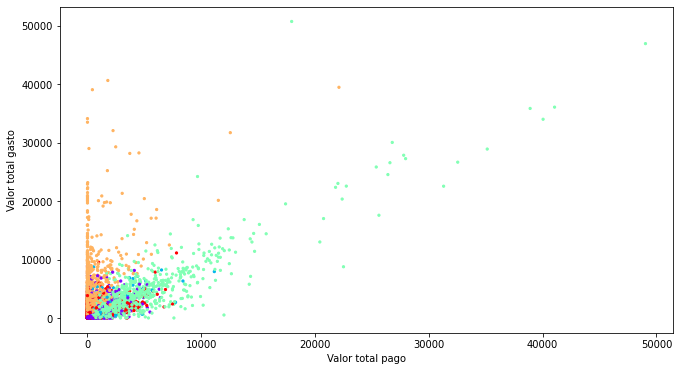

In [27]:
#interpretar o resultados dos clusters
#ver um grafico com pagamento e valor gasto
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show

In [30]:
import seaborn as sns
dataframe['cluster'] = labels
#sns.pairplot(dataframe[0:], hue='cluster')
#esse comando vai fazer um grafico do cruzamento de todas as colunas entre si. serao gerados graficos para cada cruzamento. por demorar demais coloquei #.

In [31]:
dataframe.groupby('cluster').describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        3280.0   443.746756   846.398201  ...         0.000000  0.444444  1.0
1         411.0  1987.501586  1854.459156  ...         0.000000  0.000000  1.0
2        1537.0  1142.320861  1664.363459  ...         0.083333  0.545455  1.0
3        1073.0  1795.328292  1982.485775  ...         0.083333  0.142857  1.0
4        2649.0  3037.962543  2478.838161  ...         0.000000  0.000000  0.6

[5 rows x 128 columns]

In [32]:
#pegando os centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [1.59999628e-01 2.45301618e-04 4.38629300e-01 2.57109259e-01
  1.81691775e-01 2.58728121e-02 2.04397971e-04 8.90423829e-05
  1.50590954e-04 9.39341912e-06 1.69901859e-04 6.17457556e-03
  6.03719056e-01 4.02576568e-01 8.54459126e-02 7.19457109e-05]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [5.

In [39]:
max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [40]:
#selecionando os parametros que tem apenas 1 zero depois da virgula
#BALANCE 0.0224
#PURCHASES 0.0197
#CASH_ADVANCE 0.0225
#CREDIT_LIMIT 0.0360
#PAYMENTS 0.0280
#fazer uma analise mais detalhada, ignorando os outros atributos

In [41]:
dataframe.groupby('cluster')['BALANCE'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3280.0,443.746756,846.398201,0.000000,23.365333,82.941478,410.126094,9630.367575
1,411.0,1987.501586,1854.459156,70.794108,1018.958891,1337.287314,2138.678431,11670.179850
2,1537.0,1142.320861,1664.363459,0.000000,212.282538,555.131027,1370.317105,19043.138560
3,1073.0,1795.328292,1982.485775,0.000000,507.076999,1088.056301,2315.003636,14581.459140
4,2649.0,3037.962543,2478.838161,6.824905,1256.612223,2174.018945,4223.867789,18495.558550


In [49]:
description = dataframe.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  ...     PAYMENTS  n_clients
cluster                            ...                        
0         443.746756   629.249107  ...   814.294226       3280
1        1987.501586   854.865815  ...  1336.238911        411
2        1142.320861  3273.425517  ...  3036.763695       1537
3        1795.328292   476.810531  ...  4713.384730       1073
4        3037.962543   385.248630  ...   968.890376       2649

[5 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [50]:
#Estes atributos podem representar os clusters pois os valores de variância obtidos indicam que o valor do centróide se diferencia entre os clusters.
#Os atributos tem 1 zero depois da virgula.

In [51]:
dataframe.groupby('cluster')['PRC_FULL_PAYMENT'].describe() #percentual do pagamento da fatura

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
1,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
2,1537.0,0.278150,0.367086,0.0,0.0,0.083333,0.545455,1.0
3,1073.0,0.117430,0.186772,0.0,0.0,0.083333,0.142857,1.0
4,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6


O numero em parenteses se refere a coluna:

Cluster 0: coluna1)Clientes com os menores valores em gastos. coluna3)Menor valor em saques. Sao clientes que gastam pouco. Clientes com maior limite. Bons pagadores. Maior número de clientes.

Cluster 1: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

Cluster 2: coluna2)Maior valor em compras com grande diferenca.
Clientes que gastam muito com compras. Melhores pagadores

Cluster 3: coluna3)Maior valor em saques.
Clientes que gastam muito com saques. Pagam as vezes.

Cluster 4: coluna1)Clientes com os maiores valores em gastos. coluna2)Menor valor em compras. coluna3)Valor considerável em saques.
Clientes que mais gastam e o foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

In [52]:
#Estrategia poderia ser aplicar um programa de pontos ao grupo do cluster 0
#dividindo em grupo controle e grupo de teste